In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_4',
                          'wgt_1_.8_.7_.6',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_4',
                               'wgt_1_.8_.7_.6',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4,]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4,]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

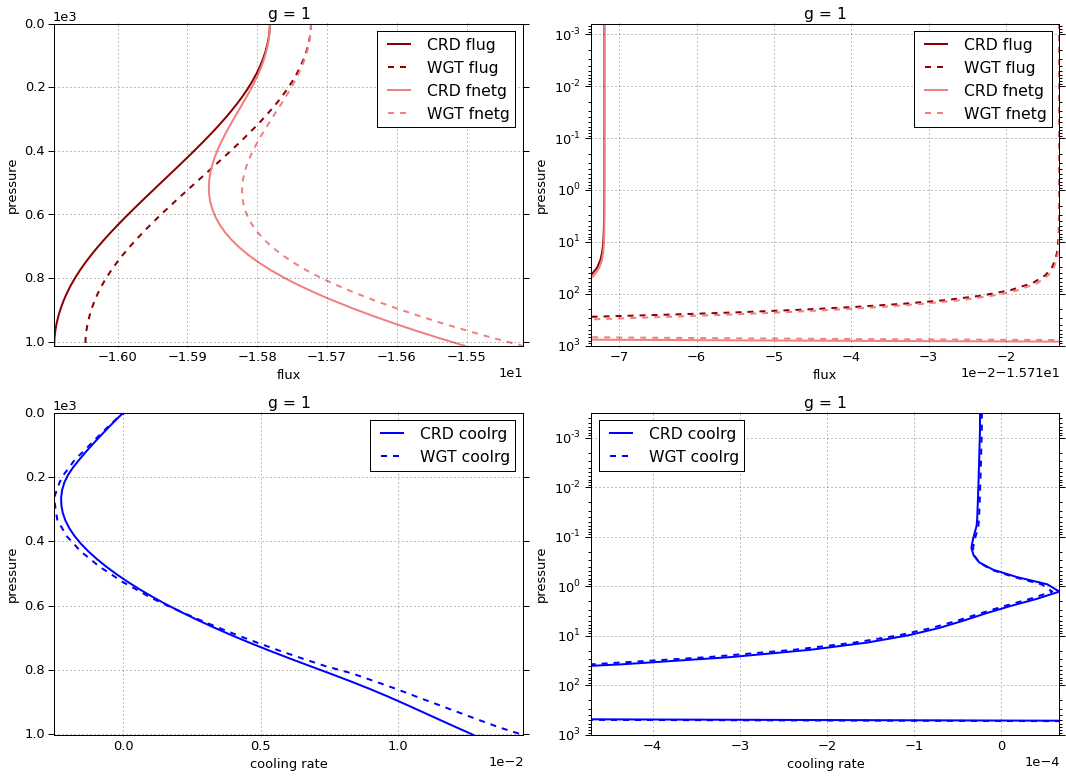

# Figure: flux, cooling rate. g-group 2

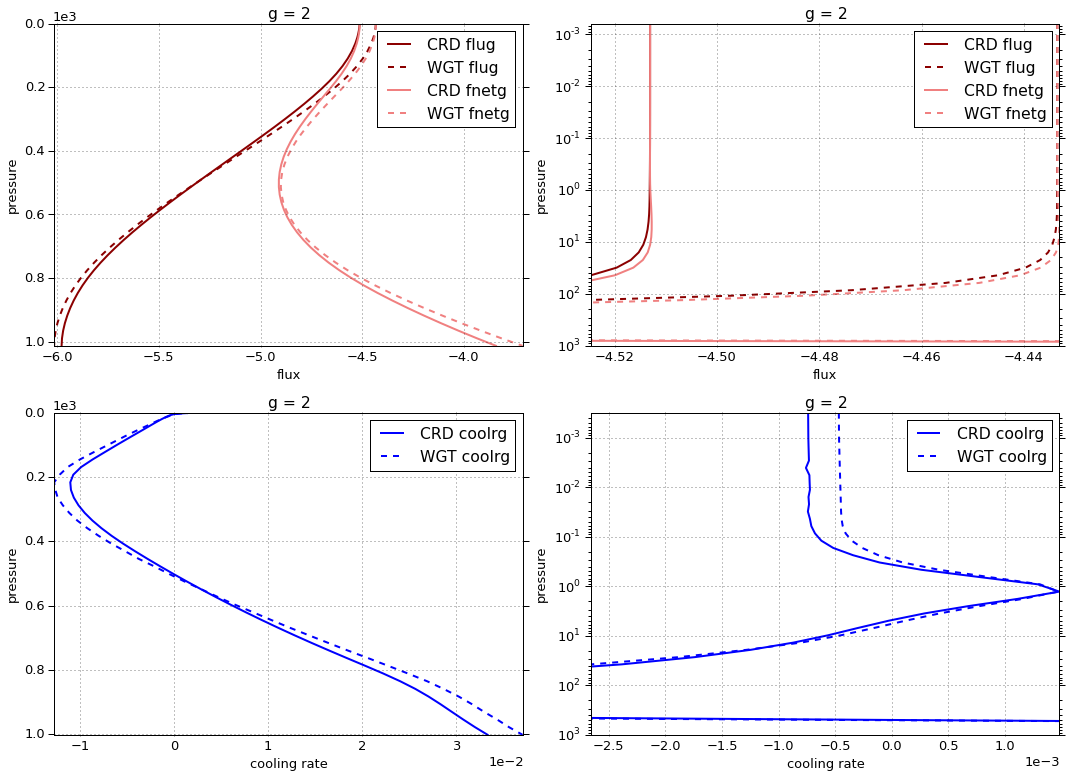

# Figure: flux, cooling rate. g-group 3

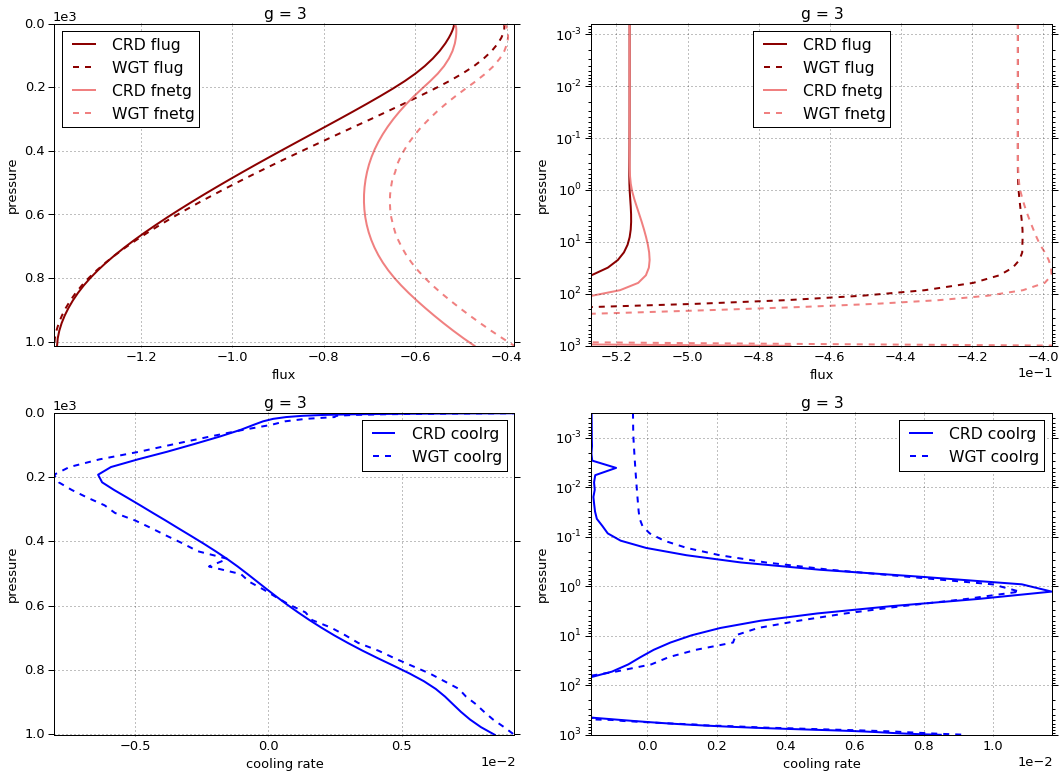

# Figure: flux, cooling rate. g-group 4

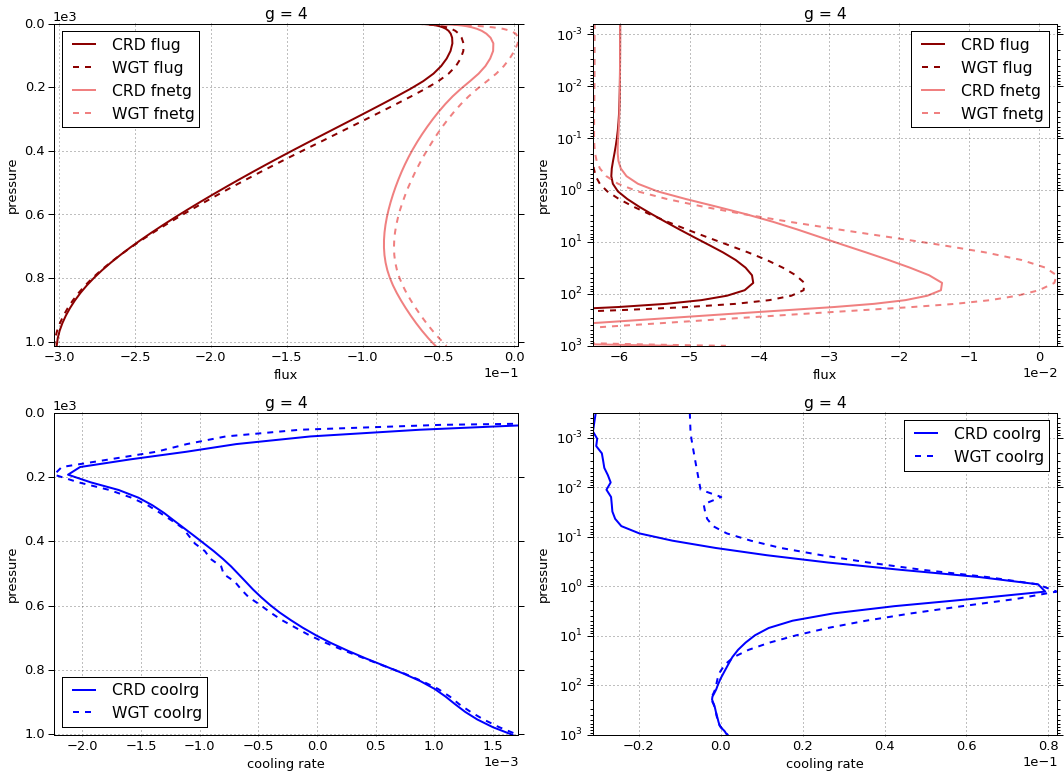

# Figure: flux, cooling rate. g-group total

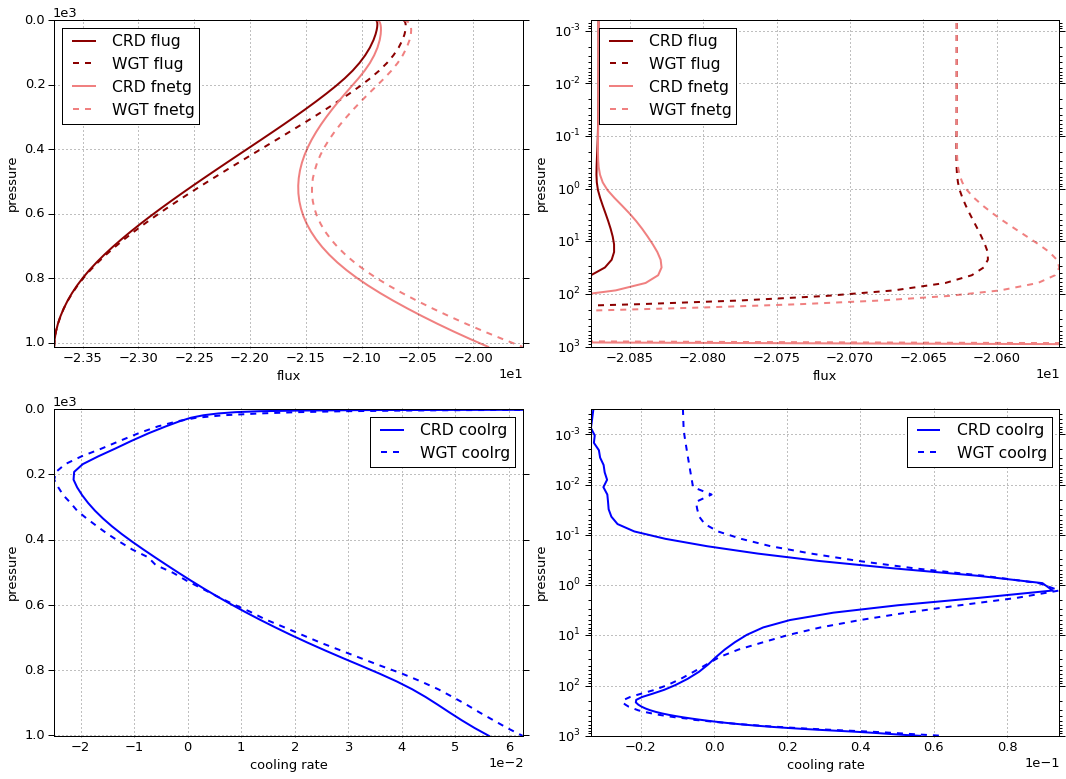

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.513059  0.000000  -4.513059
  1013     76     -5.979005  2.136721  -3.842284
3 0        1      -0.516288  0.000000  -0.516288
  1013     76     -1.383483  0.912395  -0.471088
4 0        1      -0.059940  0.000000  -0.059940
  1013     76     -0.301745  0.249674  -0.052071


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.723096  0.000000 -15.723096
  1013     76    -16.046320  0.626262 -15.420058
2 0        1      -4.433499  0.000000  -4.433499
  1013     76     -6.015587  2.304140  -3.711447
3 0        1      -0.407098  0.000000  -0.407098
  1013     76     -1.389833  1.005993  -0.383840
4 0        1      -0.063645  0.000000  -0.063645
  1013     76     -0.303431  0.258616  -0.044815


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.058867  0.000000  0.058867
  1013     76     0.044618  0.038234  0.082852
2 0        1      0.079560  0.000000  0.079560
  1013     76    -0.036582  0.167419  0.130837
3 0        1      0.109190  0.000000  0.109190
  1013     76    -0.006350  0.093598  0.087248
4 0        1     -0.003705  0.000000 -0.003705
  1013     76    -0.001686  0.008942  0.007256

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000740
  1001.112500 75     0.033380
3 0.000312    1     -0.001619
  1001.112500 75     0.008495
4 0.000312    1     -0.030518
  1001.112500 75     0.001665


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000022
  1001.112500 75     0.014516
2 0.000312    1     -0.000468
  1001.112500 75     0.037100
3 0.000312    1     -0.000420
  1001.112500 75     0.009232
4 0.000312    1     -0.007557
  1001.112500 75     0.001711


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75     0.001795
2 0.000312    1      0.000271
  1001.112500 75     0.003720
3 0.000312    1      0.001199
  1001.112500 75     0.000737
4 0.000312    1      0.022961
  1001.112500 75     0.000045

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871251,0.000000,-20.871251
1013,76,-23.755171,3.886817,-19.868353



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.627339,0.00000,-20.627339
1013,76,-23.755171,4.19501,-19.560160



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,2.439122e-01,0.000000,0.243912
1013,76,-1.100000e-07,0.308193,0.308193


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032901
1001.112500,75,0.056261



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.008467
1001.112500,75,0.062558



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.024434
1001.112500,75,0.006298


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.244758,0.253233
3,0.056879,0.058507
4,0.012364,0.012773


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.781963  0.000000e+00 -15.781963   1     1   
0.000624      1     2 -15.781963  2.003504e-10 -15.781963   1     2   
0.000876      1     3 -15.781963  2.826021e-10 -15.781963   1     3   
0.001229      1     4 -15.781963  4.014060e-10 -15.781963   1     4   
0.001723      1     5 -15.781963  5.741030e-10 -15.781963   1     5   
0.002417      1     6 -15.781963  8.251961e-10 -15.781963   1     6   
0.003391      1     7 -15.781963  1.190350e-09 -15.781963   1     7   
0.004757      1     8 -15.781963  1.721467e-09 -15.781963   1     8   
0.006672      1     9 -15.781963  2.494083e-09 -15.781963   1     9   
0.009359      1    10 -15.781963  3.618367e-09 -15.781963   1    10   
0.013128      1    11 -15.781963  5.255029e-09 -15.781963   1    11   
0.018415      1    12 -15.781963  7.638962e-09 -15.781963   1    12   
0.025830      1    13 -15.781963  1.111411e-08 -15.781963   1    13   
0.036232      1    14 -15.781963  1.618716e-08 -15.781963   1    14   
0.050823      1    15 -15.781963  2.368648e-08 -15.781963   1    15   
0.071291      1    16 -15.781963  3.567964e-08 -15.781963   1    16   
0.100000      1    17 -15.781964  5.822270e-08 -15.781963   1    17   
0.140271      1    18 -15.781964  1.057814e-07 -15.781964   1    18   
0.196760      1    19 -15.781964  2.085399e-07 -15.781964   1    19   
0.275997      1    20 -15.781965  4.310448e-07 -15.781964   1    20   
0.387100      1    21 -15.781965  9.126918e-07 -15.781965   1    21   
0.543100      1    22 -15.781967  1.955121e-06 -15.781965   1    22   
0.761700      1    23 -15.781968  4.175870e-06 -15.781964   1    23   
1.068500      1    24 -15.781971  8.476286e-06 -15.781962   1    24   
1.498800      1    25 -15.781974  1.511438e-05 -15.781959   1    25   
2.102400      1    26 -15.781979  2.314455e-05 -15.781956   1    26   
2.949000      1    27 -15.781987  3.241802e-05 -15.781955   1    27   
4.136600      1    28 -15.782001  4.336464e-05 -15.781958   1    28   
5.802500      1    29 -15.782023  5.695675e-05 -15.781966   1    29   
8.139200      1    30 -15.782061  7.490938e-05 -15.781986   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.856694  1.667641e-02 -15.840018   1    47   
347.300000    1    48 -15.866811  2.089630e-02 -15.845915   1    48   
371.075000    1    49 -15.877296  2.588300e-02 -15.851413   1    49   
394.850000    1    50 -15.888087  3.169771e-02 -15.856389   1    50   
418.625000    1    51 -15.899117  3.839908e-02 -15.860718   1    51   
442.400000    1    52 -15.910328  4.604007e-02 -15.864288   1    52   
466.175000    1    53 -15.921658  5.466656e-02 -15.866991   1    53   
489.950000    1    54 -15.933054  6.432206e-02 -15.868732   1    54   
513.725000    1    55 -15.944458  7.504653e-02 -15.869411   1    55   
537.500000    1    56 -15.955816  8.687433e-02 -15.868942   1    56   
561.275000    1    57 -15.967071  9.984574e-02 -15.867225   1    57   
585.050000    1    58 -15.978165  1.139959e-01 -15.864169   1    58   
608.825000    1    59 -15.989040  1.293595e-01 -15.859681   1    59   
632.600000    1    60 -15.999636  1.459726e-01 -15.853663   1    60   
656.375000    1    61 -16.009891  1.638637e-01 -15.846027   1    61   
680.150000    1    62 -16.019745  1.830612e-01 -15.836683   1    62   
703.925000    1    63 -16.029136  2.035880e-01 -15.825548   1    63   
727.700000    1    64 -16.038003  2.254694e-01 -15.812533   1    64   
751.475000    1    65 -16.046283  2.487245e-01 -15.797558   1    65   
775.250000    1    66 -16.053920  2.733716e-01 -15.780549   1    66   
799.025000    1    67 -16.060863  2.994112e-01 -15.761452   1    67   
822.800000    1    68 -16.067076  3.268266e-01 -15.740249   1    68   
846.575000    1    69 -16.072547  3.

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -4.513059  0.000000e+00 -4.513059   2     1 -4.433499   
0.000624      2     2 -4.513059  7.880482e-09 -4.513059   2     2 -4.433499   
0.000876      2     3 -4.513059  1.110173e-08 -4.513059   2     3 -4.433500   
0.001229      2     4 -4.513059  1.571243e-08 -4.513059   2     4 -4.433500   
0.001723      2     5 -4.513060  2.235067e-08 -4.513060   2     5 -4.433500   
0.002417      2     6 -4.513060  3.190954e-08 -4.513060   2     6 -4.433500   
0.003391      2     7 -4.513060  4.567571e-08 -4.513060   2     7 -4.433500   
0.004757      2     8 -4.513060  6.550194e-08 -4.513060   2     8 -4.433500   
0.006672      2     9 -4.513060  9.405520e-08 -4.513060   2     9 -4.433500   
0.009359      2    10 -4.513060  1.351805e-07 -4.513060   2    10 -4.433500   
0.013128      2    11 -4.513061  1.944179e-07 -4.513061   2    11 -4.433500   
0.018415      2    12 -4.513061  2.797568e-07 -4.513061   2    12 -4.433501   
0.025830      2    13 -4.513062  4.027219e-07 -4.513062   2    13 -4.433501   
0.036232      2    14 -4.513063  5.800070e-07 -4.513063   2    14 -4.433502   
0.050823      2    15 -4.513065  8.384221e-07 -4.513064   2    15 -4.433503   
0.071291      2    16 -4.513067  1.237720e-06 -4.513065   2    16 -4.433504   
0.100000      2    17 -4.513070  1.928156e-06 -4.513068   2    17 -4.433506   
0.140271      2    18 -4.513074  3.226871e-06 -4.513071   2    18 -4.433509   
0.196760      2    19 -4.513080  5.725236e-06 -4.513074   2    19 -4.433512   
0.275997      2    20 -4.513088  1.054719e-05 -4.513078   2    20 -4.433517   
0.387100      2    21 -4.513099  1.986574e-05 -4.513079   2    21 -4.433523   
0.543100      2    22 -4.513112  3.790620e-05 -4.513074   2    22 -4.433530   
0.761700      2    23 -4.513126  7.237265e-05 -4.513054   2    23 -4.433536   
1.068500      2    24 -4.513141  1.334556e-04 -4.513007   2    24 -4.433538   
1.498800      2    25 -4.513157  2.249929e-04 -4.512932   2    25 -4.433538   
2.102400      2    26 -4.513189  3.373067e-04 -4.512852   2    26 -4.433549   
2.949000      2    27 -4.513253  4.683694e-04 -4.512785   2    27 -4.433582   
4.136600      2    28 -4.513366  6.216351e-04 -4.512744   2    28 -4.433654   
5.802500      2    29 -4.513556  8.059251e-04 -4.512750   2    29 -4.433790   
8.139200      2    30 -4.513870  1.037107e-03 -4.512833   2    30 -4.434040   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.929194  1.227621e-01 -4.806432   2    47 -4.894341   
347.300000    2    48 -4.979805  1.489522e-01 -4.830853   2    48 -4.950069   
371.075000    2    49 -5.031282  1.787183e-01 -4.852564   2    49 -5.006647   
394.850000    2    50 -5.083348  2.121324e-01 -4.871216   2    50 -5.063733   
418.625000    2    51 -5.135712  2.492142e-01 -4.886498   2    51 -5.121037   
442.400000    2    52 -5.188135  2.899538e-01 -4.898181   2    52 -5.178174   
466.175000    2    53 -5.240411  3.343112e-01 -4.906099   2    53 -5.235143   
489.950000    2    54 -5.292349  3.822197e-01 -4.910130   2    54 -5.291524   
513.725000    2    55 -5.343775  4.335994e-01 -4.910175   2    55 -5.347179   
537.500000    2    56 -5.394509  4.883715e-01 -4.906138   2    56 -5.401907   
561.275000    2    57 -5.444364  5.464649e-01 -4.897899   2    57 -5.455574   
585.050000    2    58 -5.493145  6.078123e-01 -4.885333   2    58 -5.507909   
608.825000    2    59 -5.540655  6.723379e-01 -4.868317   2    59 -5.558686   
632.600000    2    60 -5.586689  7.399796e-01 -4.846709   2    60 -5.607689   
656.375000    2    61 -5.631038  8.106555e-01 -4.820383   2    61 -5.654722   
680.150000    2    62 -5.673484  8.842835e-01 -4.789200   2    62 -5.699607   
703.925000    2    63 -5.713801  9.607793e-01 -4.753022   2   

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.516288  0.000000e+00 -0.516288   3     1 -0.407098   
0.000624      3     2 -0.516288  3.484824e-08 -0.516288   3     2 -0.407098   
0.000876      3     3 -0.516288  4.912903e-08 -0.516288   3     3 -0.407098   
0.001229      3     4 -0.516288  6.967592e-08 -0.516288   3     4 -0.407098   
0.001723      3     5 -0.516288  9.942090e-08 -0.516288   3     5 -0.407098   
0.002417      3     6 -0.516289  1.424849e-07 -0.516288   3     6 -0.407098   
0.003391      3     7 -0.516289  2.048340e-07 -0.516289   3     7 -0.407098   
0.004757      3     8 -0.516289  2.951003e-07 -0.516289   3     8 -0.407098   
0.006672      3     9 -0.516290  4.257664e-07 -0.516289   3     9 -0.407098   
0.009359      3    10 -0.516290  6.149085e-07 -0.516290   3    10 -0.407099   
0.013128      3    11 -0.516291  8.886804e-07 -0.516290   3    11 -0.407099   
0.018415      3    12 -0.516293  1.284945e-06 -0.516291   3    12 -0.407100   
0.025830      3    13 -0.516294  1.858509e-06 -0.516293   3    13 -0.407100   
0.036232      3    14 -0.516297  2.689000e-06 -0.516294   3    14 -0.407101   
0.050823      3    15 -0.516301  3.904939e-06 -0.516297   3    15 -0.407102   
0.071291      3    16 -0.516306  5.809490e-06 -0.516300   3    16 -0.407104   
0.100000      3    17 -0.516313  9.213974e-06 -0.516304   3    17 -0.407106   
0.140271      3    18 -0.516324  1.586369e-05 -0.516308   3    18 -0.407109   
0.196760      3    19 -0.516337  2.900374e-05 -0.516308   3    19 -0.407111   
0.275997      3    20 -0.516352  5.474287e-05 -0.516297   3    20 -0.407110   
0.387100      3    21 -0.516366  1.046275e-04 -0.516262   3    21 -0.407101   
0.543100      3    22 -0.516370  2.003556e-04 -0.516169   3    22 -0.407073   
0.761700      3    23 -0.516341  3.795700e-04 -0.515961   3    23 -0.407008   
1.068500      3    24 -0.516256  6.883286e-04 -0.515567   3    24 -0.406876   
1.498800      3    25 -0.516111  1.140879e-03 -0.514970   3    25 -0.406672   
2.102400      3    26 -0.515967  1.683580e-03 -0.514284   3    26 -0.406439   
2.949000      3    27 -0.515870  2.294228e-03 -0.513575   3    27 -0.406203   
4.136600      3    28 -0.515854  2.971221e-03 -0.512883   3    28 -0.405981   
5.802500      3    29 -0.515969  3.732952e-03 -0.512236   3    29 -0.405809   
8.139200      3    30 -0.516273  4.620914e-03 -0.511653   3    30 -0.405767   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.796488  1.359873e-01 -0.660501   3    47 -0.733242   
347.300000    3    48 -0.827012  1.556659e-01 -0.671346   3    48 -0.769048   
371.075000    3    49 -0.857554  1.766865e-01 -0.680867   3    49 -0.804764   
394.850000    3    50 -0.887977  1.989286e-01 -0.689049   3    50 -0.840181   
418.625000    3    51 -0.918151  2.222450e-01 -0.695906   3    51 -0.875178   
442.400000    3    52 -0.947975  2.464820e-01 -0.701493   3    52 -0.909694   
466.175000    3    53 -0.977380  2.715125e-01 -0.705868   3    53 -0.943635   
489.950000    3    54 -1.006315  2.972030e-01 -0.709112   3    54 -0.976807   
513.725000    3    55 -1.034741  3.234406e-01 -0.711300   3    55 -1.009234   
537.500000    3    56 -1.062608  3.501476e-01 -0.712460   3    56 -1.040892   
561.275000    3    57 -1.089864  3.772691e-01 -0.712595   3    57 -1.071796   
585.050000    3    58 -1.116443  4.047648e-01 -0.711678   3    58 -1.101609   
608.825000    3    59 -1.142266  4.325880e-01 -0.709678   3    59 -1.130476   
632.600000    3    60 -1.167253  4.607173e-01 -0.706535   3    60 -1.158265   
656.375000    3    61 -1.191320  4.891233e-01 -0.702197   3    61 -1.184858   
680.150000    3    62 -1.214368  5.177835e-01 -0.696584   3    62 -1.210175   
703.925000    3    63 -1.236288  5.466648e-01 -0.689624   3   

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.059940  0.000000e+00 -0.059940   4     1 -0.063645   
0.000624      4     2 -0.059944  8.248267e-07 -0.059943   4     2 -0.063646   
0.000876      4     3 -0.059945  1.161215e-06 -0.059944   4     3 -0.063647   
0.001229      4     4 -0.059947  1.640727e-06 -0.059945   4     4 -0.063647   
0.001723      4     5 -0.059949  2.328013e-06 -0.059947   4     5 -0.063648   
0.002417      4     6 -0.059952  3.312970e-06 -0.059949   4     6 -0.063649   
0.003391      4     7 -0.059957  4.724171e-06 -0.059952   4     7 -0.063651   
0.004757      4     8 -0.059964  6.745160e-06 -0.059957   4     8 -0.063653   
0.006672      4     9 -0.059973  9.637384e-06 -0.059963   4     9 -0.063656   
0.009359      4    10 -0.059986  1.377293e-05 -0.059972   4    10 -0.063660   
0.013128      4    11 -0.060004  1.967915e-05 -0.059984   4    11 -0.063666   
0.018415      4    12 -0.060029  2.810037e-05 -0.060001   4    12 -0.063671   
0.025830      4    13 -0.060064  4.007987e-05 -0.060024   4    13 -0.063682   
0.036232      4    14 -0.060114  5.704961e-05 -0.060057   4    14 -0.063697   
0.050823      4    15 -0.060183  8.138108e-05 -0.060102   4    15 -0.063718   
0.071291      4    16 -0.060278  1.178790e-04 -0.060160   4    16 -0.063745   
0.100000      4    17 -0.060405  1.773768e-04 -0.060228   4    17 -0.063779   
0.140271      4    18 -0.060565  2.806115e-04 -0.060284   4    18 -0.063811   
0.196760      4    19 -0.060754  4.607780e-04 -0.060293   4    19 -0.063832   
0.275997      4    20 -0.060958  7.708980e-04 -0.060187   4    20 -0.063812   
0.387100      4    21 -0.061140  1.296310e-03 -0.059843   4    21 -0.063709   
0.543100      4    22 -0.061206  2.172190e-03 -0.059034   4    22 -0.063444   
0.761700      4    23 -0.060984  3.584910e-03 -0.057399   4    23 -0.062851   
1.068500      4    24 -0.060261  5.678770e-03 -0.054583   4    24 -0.061778   
1.498800      4    25 -0.058914  8.369891e-03 -0.050544   4    25 -0.060111   
2.102400      4    26 -0.057238  1.108910e-02 -0.046149   4    26 -0.058051   
2.949000      4    27 -0.055385  1.348992e-02 -0.041895   4    27 -0.055708   
4.136600      4    28 -0.053440  1.540404e-02 -0.038036   4    28 -0.053138   
5.802500      4    29 -0.051439  1.686345e-02 -0.034575   4    29 -0.050393   
8.139200      4    30 -0.049388  1.805394e-02 -0.031334   4    30 -0.047524   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.115834  5.843231e-02 -0.057402   4    47 -0.107569   
347.300000    4    48 -0.125512  6.467631e-02 -0.060836   4    48 -0.117605   
371.075000    4    49 -0.135146  7.111834e-02 -0.064028   4    49 -0.127610   
394.850000    4    50 -0.144698  7.771988e-02 -0.066978   4    50 -0.137734   
418.625000    4    51 -0.154130  8.443816e-02 -0.069692   4    51 -0.147737   
442.400000    4    52 -0.163412  9.124200e-02 -0.072170   4    52 -0.157580   
466.175000    4    53 -0.172531  9.809979e-02 -0.074432   4    53 -0.167313   
489.950000    4    54 -0.181482  1.049883e-01 -0.076494   4    54 -0.176810   
513.725000    4    55 -0.190269  1.118880e-01 -0.078381   4    55 -0.186214   
537.500000    4    56 -0.198897  1.188043e-01 -0.080092   4    56 -0.195370   
561.275000    4    57 -0.207350  1.257195e-01 -0.081631   4    57 -0.204352   
585.050000    4    58 -0.215613  1.326377e-01 -0.082976   4    58 -0.213154   
608.825000    4    59 -0.223666  1.395549e-01 -0.084111   4    59 -0.221689   
632.600000    4    60 -0.231487  1.464744e-01 -0.085013   4    60 -0.229973   
656.375000    4    61 -0.239048  1.534023e-01 -0.085646   4    61 -0.237989   
680.150000    4    62 -0.246328  1.603375e-01 -0.085991   4    62 -0.245669   
703.925000    4    63 -0.253285  1.672708e-01 -0.086014   4   

In [21]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')